In [1]:
import sys
sys.path.append("../..")

import Beam
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## System settings

In [2]:
Nx = 300
Ny = 300

dx = 1.0*10**-6
dy = 1.0*10**-6
Lx = dx*Nx
Ly = dy*Ny
delta = 15.0*10**-6
n0 = 1.45
k0 = 2.0*np.pi/(633.0*10**-9)

Z = 30.0*10**-3

## Define the dielectric function

In [3]:
def dn(z):
    return np.zeros((Nx,Ny))

## Define the initial field distribution

In [4]:
x = np.linspace(0,Lx,Nx)
y = np.linspace(0,Ly,Ny)
x,y = np.meshgrid(x,y)
    
initfield = np.exp(-((x-Lx/2)**2+(y-Ly/2)**2)/(delta**2))

## Perform the BPM calculation

In [5]:
bpm = Beam.BPM3rd(n0=n0,k0=k0,dx=dx,dy=dy,Nx=Nx,Ny=Ny,dn=dn,verbose=True) 

Initiating the H0...Done!


In [6]:
fields = bpm.calculate(zs=[0, Z],field0=initfield, verbose=True)

Perform the ODE solver with the method [RK45]...Done! Spend time: [0 min 29 sec]


## Plot the result

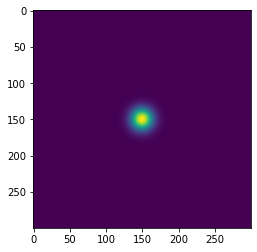

In [9]:
field = fields[-1]
plt.imshow(np.real(field))
plt.show()